<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [72]:
#!pip install xgboost

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [74]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")


## EDA

In [75]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [79]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [81]:
# Fill null values
train.fillna({"Age": train["Age"].median()}, inplace=True)
train.fillna({"Cabin": train["Cabin"].mode()[0]}, inplace=True)
train.fillna({"Embarked": train["Embarked"].mode()[0]}, inplace=True)

test.fillna({"Age": test["Age"].median()}, inplace=True)
test.fillna({"Fare": test["Fare"].median()}, inplace=True)
test.fillna({"Cabin": test["Cabin"].mode()[0]}, inplace=True)


In [82]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Preprocessing

In [84]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [85]:
test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [86]:
# Encoding
from sklearn.preprocessing import LabelEncoder

train["Sex"] = LabelEncoder().fit_transform(train["Sex"])
train = pd.get_dummies(train, columns=["Pclass", "Embarked"])


In [87]:
train["Family"] = train["SibSp"] + train["Parch"]
test["Family"] = test["SibSp"] + test["Parch"]

In [88]:
# Remove unnecessary columns

train.drop(
    ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"], axis=1, inplace=True
)
test.drop(
    ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"], axis=1, inplace=True
)


In [89]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    uint8  
 5   Pclass_2    891 non-null    uint8  
 6   Pclass_3    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  Family      891 non-null    int64  
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 36.7 KB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
 5   Family    418 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


## Strorytelling - Visualization

In [91]:
corr = train.corr()
corr.shape


(11, 11)

<AxesSubplot:>

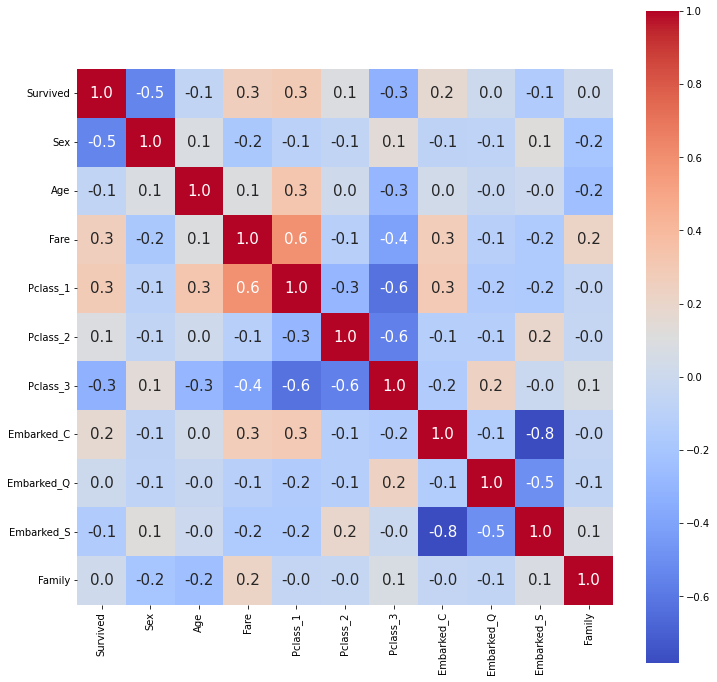

In [92]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr,
    cbar=True,
    square=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 15},
    cmap="coolwarm",
)


## Train your model (Classification)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [94]:
feature_train = train["Survived"]
label_train = train.drop(["Survived"], axis=1)


In [95]:
X_train, X_validation, y_train, y_validation = train_test_split(
    label_train, feature_train, test_size=0.2, random_state=0
)


#### Logistic Regression

Logistic Regression Accuracy:  0.8156424581005587
Logistic Regression Cross validation score:  0.7978482003129891
Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



Text(0.5, 1.05, 'Logistic Regression Confusion matrix')

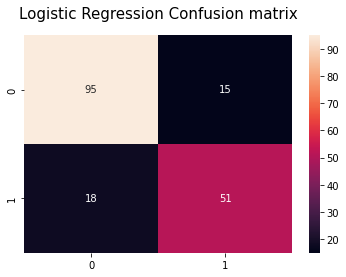

In [96]:

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

print("Logistic Regression Accuracy: ", model_lr.score(X_validation, y_validation))
print("Logistic Regression Cross validation score: ", np.mean(cross_val_score(model_lr, X_train, y_train, cv=10)))
print("Logistic Regression Classification report:\n", metrics.classification_report(y_validation, model_lr.predict(X_validation)))

y_pred = model_lr.predict(X_validation)
sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
plt.title('Logistic Regression Confusion matrix', y=1.05, size=15)

#### KNN Regressor

Knn Regressor Accuracy:  0.7597765363128491
Knn Regressor validation score:  0.6969287949921753
Knn Regressor Classification report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       110
           1       0.72      0.61      0.66        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.76      0.76       179



Text(0.5, 1.05, 'Knn Regressor Confusion matrix')

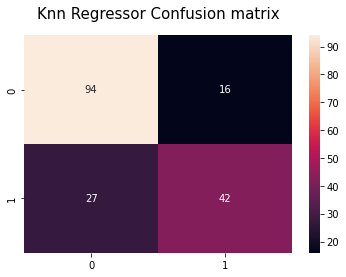

In [97]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

print("Knn Regressor Accuracy: ", model_knn.score(X_validation, y_validation))
print(
    "Knn Regressor validation score: ",
    np.mean(cross_val_score(model_knn, X_train, y_train, cv=10)),
)
print("Knn Regressor Classification report:\n", metrics.classification_report(y_validation, model_knn.predict(X_validation)))

y_pred = model_knn.predict(X_validation)
sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
plt.title("Knn Regressor Confusion matrix", y=1.05, size=15)

#### Dicision Tree

Decision tree Accuracy:  0.8156424581005587
Decision tree Cross validation score:  0.8048513302034429
Decision tree Classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



Text(0.5, 1.05, 'Decision tree Confusion matrix')

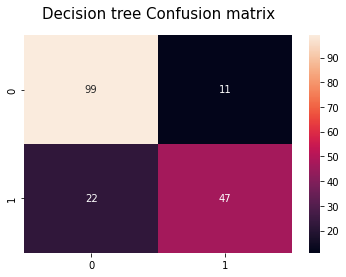

In [98]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=5)
model_tree = model_tree.fit(X_train, y_train)

print("Decision tree Accuracy: ", model_tree.score(X_validation, y_validation))
print("Decision tree Cross validation score: ", np.mean(cross_val_score(model_tree, X_train, y_train, cv=10)))
print("Decision tree Classification report:\n", metrics.classification_report(y_validation, model_tree.predict(X_validation)))

y_pred = model_tree.predict(X_validation)
sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
plt.title('Decision tree Confusion matrix', y=1.05, size=15)

#### RandomForest

RandomForest Accuracy:  0.8547486033519553
RandomForest Cross validation score:  0.8188575899843507
RandomForest Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.89      0.71      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



Text(0.5, 1.05, 'RandomForest Confusion matrix')

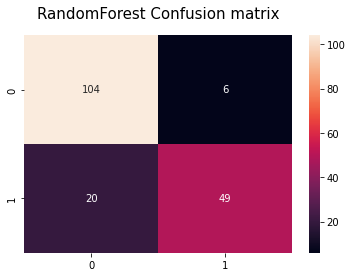

In [99]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    criterion="entropy",
    n_estimators=700,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features="auto",
    oob_score=True,
    random_state=1,
    n_jobs=-1,
)
model_rf.fit(X_train, y_train)

print("RandomForest Accuracy: ", model_rf.score(X_validation, y_validation))
print("RandomForest Cross validation score: ", np.mean(cross_val_score(model_rf, X_train, y_train, cv=10)))
print("RandomForest Classification report:\n", metrics.classification_report(y_validation, model_rf.predict(X_validation)))

y_pred = model_rf.predict(X_validation)
sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
plt.title('RandomForest Confusion matrix', y=1.05, size=15)

#### SVM

SVM Accuracy:  0.7877094972067039
SVM Cross validation score:  0.7866197183098592
SVM Classification report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



Text(0.5, 1.05, 'SVM Confusion matrix')

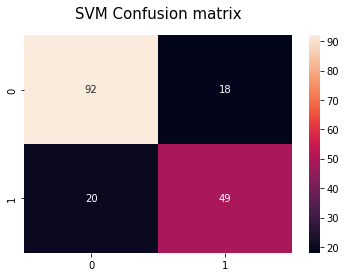

In [100]:
from sklearn import svm

model_svm = svm.SVC(kernel="linear", C=1, gamma=0.1)
model_svm.fit(X_train, y_train)

print("SVM Accuracy: ", model_svm.score(X_validation, y_validation))
print("SVM Cross validation score: ", np.mean(cross_val_score(model_svm, X_train, y_train, cv=10)))
print("SVM Classification report:\n", metrics.classification_report(y_validation, model_svm.predict(X_validation)))

y_pred = model_svm.predict(X_validation)
sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
plt.title('SVM Confusion matrix', y=1.05, size=15)

#### XGBoost

XGBoost Accuracy:  0.8603351955307262
XGBoost Cross validation score:  0.7977308294209703
XGBoost Classification report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.82      0.81      0.82        69

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



Text(0.5, 1.05, 'XGBoost Confusion matrix')

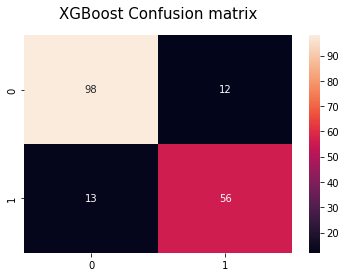

In [101]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(gamma=0.1, max_depth=10, n_estimators=700)
model_xgb.fit(X_train, y_train)

print("XGBoost Accuracy: ", model_xgb.score(X_validation, y_validation))
print("XGBoost Cross validation score: ", np.mean(cross_val_score(model_xgb, X_train, y_train, cv=10)))
print("XGBoost Classification report:\n", metrics.classification_report(y_validation, model_xgb.predict(X_validation)))

y_pred = model_xgb.predict(X_validation)
sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
plt.title('XGBoost Confusion matrix', y=1.05, size=15)

## Test Result

##### As we have seen, RandomForest and XGBoost has the best results. We can use either one to predict results based on the test data.

In [102]:
# To predict and save the test data

# y_pred = model_xgb.predict(test)
# output = pd.DataFrame({'Survived': y_pred})
# output.head()
# output.to_csv('submission.csv', index=False)

## Send us the Result (Maktabkhoone)